In [7]:
import os
import sys

repo_root_path = os.path.abspath(os.path.join(os.path.pardir, 'hebbnets'))
if repo_root_path not in sys.path:
    sys.path.append(repo_root_path)

import numpy as np
import matplotlib.pyplot as plt

from demo_utils import get_random_data
from hebbnets.hebbnets.hah_model import MultilayerHahNetwork

%matplotlib nbagg

# Set up demo data

In [8]:
num_samples = 25
data_output_dimension = 100
data_latent_dimension = 3

demo_data = get_random_data(
    num_samples,
    data_output_dimension,
    latent_dim=data_latent_dimension
)

# Set up HAH network

In [9]:
input_layer_size = data_output_dimension
nodes_per_layer = [2]

hah_network = MultilayerHahNetwork(
    input_layer_size,
    nodes_per_layer,
    has_bias=False,
    act_type='linear',
)

# Train network

In [10]:
hah_network.train(demo_data, num_epochs=1000)

# Compare network to top PC

In [11]:
# Get top principle component for input sample
U, S, V = np.linalg.svd(np.array(demo_data))
_idx = np.argsort(S)[-nodes_per_layer[0]:]
top_principal_comps = V[_idx, :].T

# Get pattern of input weights in network
hah_input_weights = np.squeeze(hah_network.layers[0].input_weights)

# Show the inner product of top two PCs with learned input weights
inner_prod_mat = top_principal_comps.T.dot(hah_input_weights)
print(inner_prod_mat)

[[ 0.55414476 -0.77155343]
 [ 0.83478333  0.63909925]]


If everything has gone well, the scatter plot below should show that the learned input-weights for this model correspond to the first principle component for this data

<IPython.core.display.Javascript object>


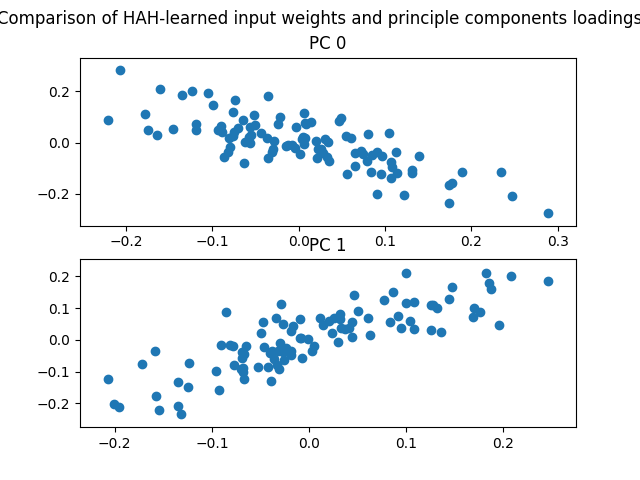

In [12]:
fig, ax = plt.subplots(nrows=2, ncols=1)

fig.suptitle('Comparison of HAH-learned input weights and principle components loadings')

for pc_idx in range(2):
    
    if np.abs(inner_prod_mat[pc_idx, pc_idx]) > np.abs(inner_prod_mat[pc_idx, 1 - pc_idx]):
        ha_idx = pc_idx
    else:
        ha_idx = 1 - pc_idx

    ax[pc_idx].set_title('PC {}'.format(pc_idx))
    ax[pc_idx].scatter(
        top_principal_comps[:, pc_idx].ravel(),
        hah_input_weights[:, ha_idx].ravel()
    )